### **Rana Ahmed Elmaghraby**
---------------------------
# **Titanic Data 🛳️⚓**


-------------------------

### **Importing libraries and loading "Titanic" file**

In [31]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
df = sns.load_dataset('titanic')

In [32]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

-------------------------------

### **Explore the data to understand key patterns and distributions**

In [33]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [35]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


----------------------

#### **We will show if there are null values or not.**

In [36]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

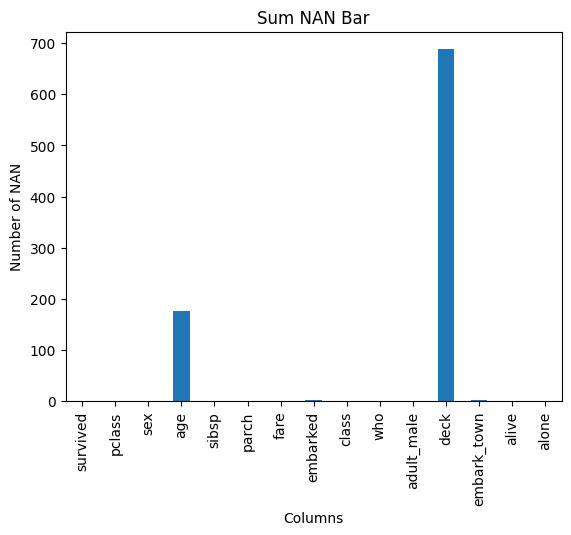

In [37]:
df.isna().sum().plot(kind="bar" , title="Sum NAN Bar" , xlabel="Columns" , ylabel="Number of NAN")
plt.show()

**we find that :** 
- age = 177 nan
- embarked = 2 nan
- deck = 688 nan 
- embark_town = 2 nan
---------------------

### **Fill missing values**

**We need to fill null values at age column with mean to continue**

In [38]:
df["age"] = df["age"].fillna(df["age"].mean())

In [39]:
df.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [40]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode())
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode())

### **Why deck = 688 nan ?!!!!**

 

In [41]:
deck_f=df[(df["deck"].isna()) & (df["class"] == "First")].shape[0]
deck_f

41

In [42]:
deck_s=df[(df["deck"].isna()) & (df["class"] == "Second")].shape[0]
deck_s

168

In [43]:
deck_t=df[(df["deck"].isna()) & (df["class"] == "Third")].shape[0]
deck_t

479

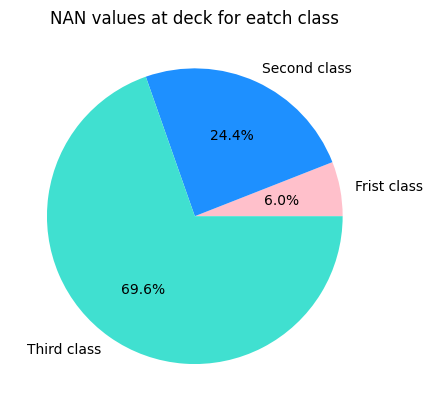

In [44]:
plt.pie([deck_f,deck_s,deck_t ],labels=["Frist class" , "Second class" , "Third class"],
         autopct='%1.1f%%' , colors=["pink" , "dodgerblue" , "turquoise"])
plt.title("NAN values at deck for eatch class")
plt.show()

**Can be concluded :**
- Most 1st-class passengers have deck info; very few 3rd-class passengers do

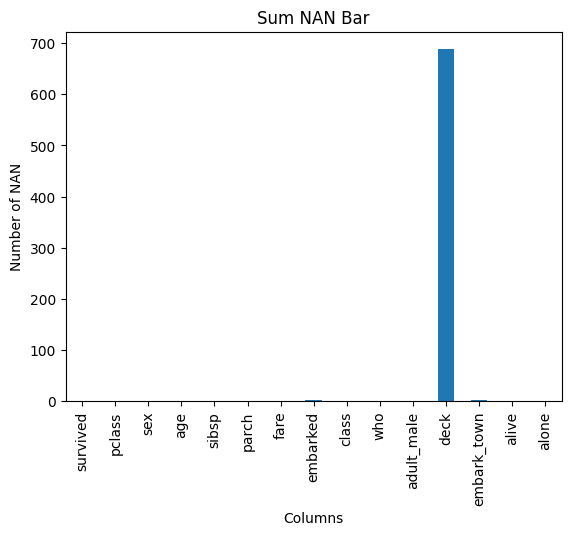

In [45]:
df.isna().sum().plot(kind="bar" , title="Sum NAN Bar" , xlabel="Columns" , ylabel="Number of NAN")
plt.show()

**Done! Bar showed that we fill age column**

---------------------

### **How strong is eatch factor's relationship to survival?!!**
- we can use Heatmap for this QS

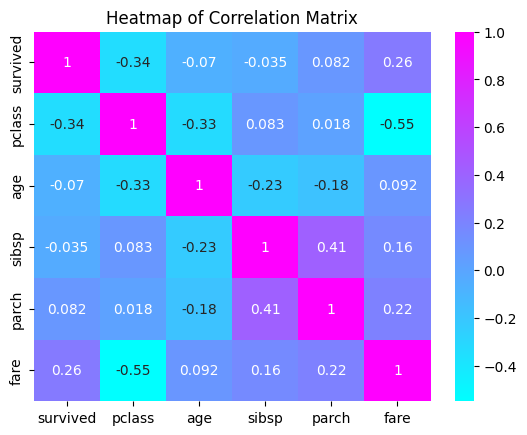

In [46]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
corr = numerical_data.corr()
sns.heatmap(corr, annot=True, cmap='cool')
plt.title("Heatmap of Correlation Matrix")
plt.show()

**Can be concluded:**
- There is a negative correlation between fare & pclass first class has higher fare
- There is a negative correlation between survived & pclass witch means
  the chance is higher for first class  
-------------------------

### **Survived male > Survived female or not ?!!**

In [47]:
df_survived_gender = pd.DataFrame(df.groupby("sex")["survived"].sum())
df_survived_gender["gender"] = ["female" , "male"]
df_survived_gender

,survived,gender
sex,,
female,233,female
male,109,male


### **We can use pie char to show % for eatch survived gender**

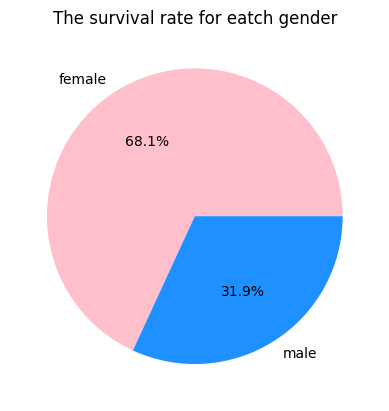

In [48]:
plt.pie(df_survived_gender["survived"] , labels=df_survived_gender["gender"] ,
         autopct="%1.1f%%" , colors=["pink" , "dodgerblue"] )
plt.title("The survival rate for eatch gender")
plt.show()

### **We can use Bar char to show sum of survived for eatch gender**

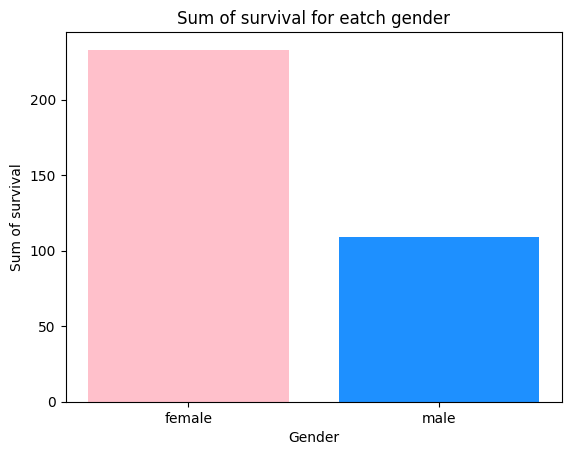

In [49]:
plt.bar( df_survived_gender["gender"] ,df_survived_gender["survived"] , color=["pink" , "dodgerblue"]  )
plt.title("Sum of survival for eatch gender")
plt.xlabel("Gender")
plt.ylabel("Sum of survival")
plt.show()

**Can be concluded :**
- Female survivors are more than males
- Female survivors = 233 = 68.1%
- males survivors  = 109 = 31.9%
----------------------

### **We can see witch class is the most surviving**

In [50]:
df_class_survived = pd.DataFrame(df.groupby("pclass")["survived"].sum())
df_class_survived["Class"] = ["First_class" , "Second_class" , "Third_class"]
df_class_survived["PClass"] = [1 , 2, 3]
df_class_survived

,survived,Class,PClass
pclass,,,
1,136,First_class,1
2,87,Second_class,2
3,119,Third_class,3


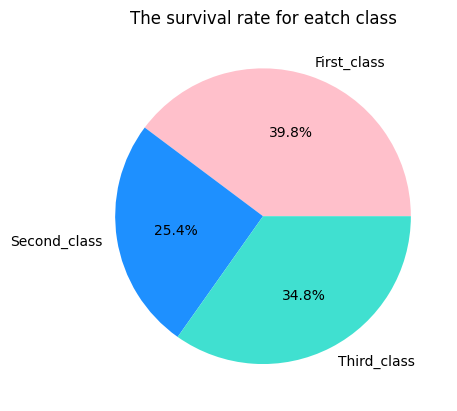

In [51]:
plt.pie(df_class_survived["survived"] ,labels=df_class_survived["Class"] , autopct="%1.1f%%" , 
        colors=["pink" , "dodgerblue" , "turquoise"])
plt.title("The survival rate for eatch class")
plt.show()

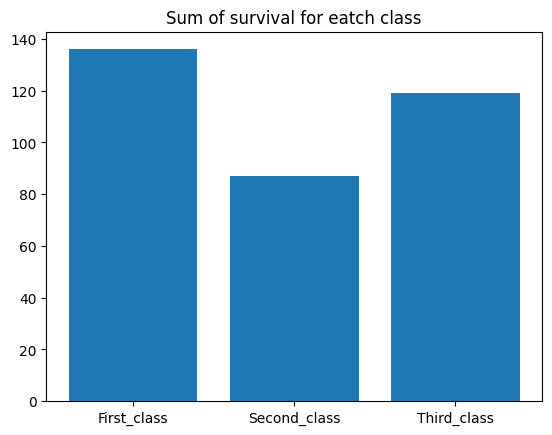

In [52]:
plt.bar(df_class_survived["Class"] , df_class_survived["survived"] )
plt.title("Sum of survival for eatch class")
plt.show()

In [53]:
df_class_gen = pd.DataFrame(df.groupby(["sex" , "class" ])["survived"].sum())

df_class_gen["sex_class"] = ["('female', 'First')" , "('female', 'Second')" ,
                            "('female', 'Third')"  , "('male', 'First')",
                            "('male', 'Second')"   , "('male', 'Third')"]
df_class_gen

C:\Users\FreeComp\AppData\Local\Temp\ipykernel_11776\1166744219.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



survived             sex_class
sex    class                                 
female First         91   ('female', 'First')
       Second        70  ('female', 'Second')
       Third         72   ('female', 'Third')
male   First         45     ('male', 'First')
       Second        17    ('male', 'Second')
       Third         47     ('male', 'Third')

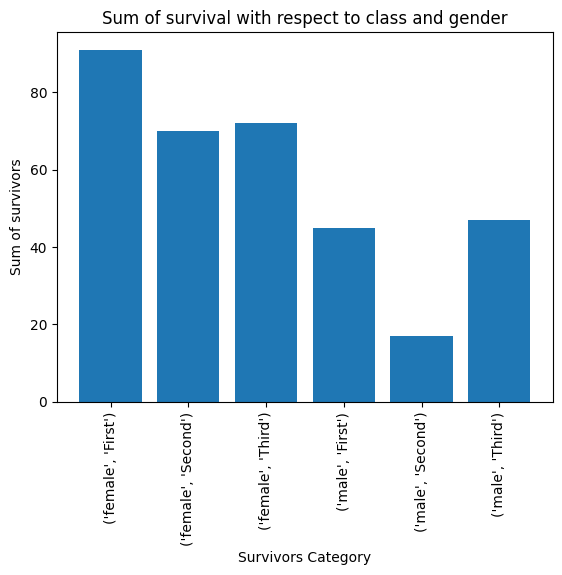

In [54]:
plt.bar(df_class_gen["sex_class"] , df_class_gen["survived"] )
plt.xlabel("Survivors Category")
plt.ylabel("Sum of survivors")
plt.xticks(rotation=90)
plt.title("Sum of survival with respect to class and gender")
plt.show()

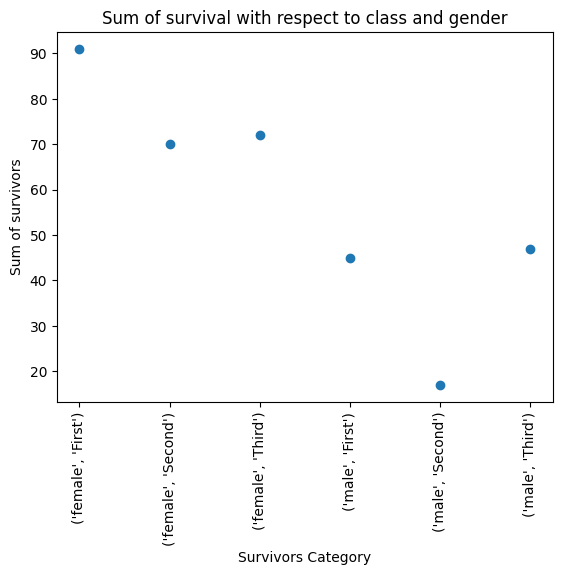

In [55]:
plt.scatter(df_class_gen["sex_class"], df_class_gen["survived"])
plt.xlabel("Survivors Category")
plt.ylabel("Sum of survivors")
plt.xticks(rotation=90)
plt.title("Sum of survival with respect to class and gender")
plt.show()

In [56]:
print(df[(df["sex"] == "male") & (df["pclass"] == 2)].shape[0])
print(df[(df["sex"] == "female") & (df["pclass"] == 2)].shape[0])
print(df[(df["sex"] == "male") & (df["pclass"] == 3)].shape[0])
print(df[(df["sex"] == "female") & (df["pclass"] == 3)].shape[0])

108
76
347
144


**Can be concluded:**
- The chance is higher for :
  - females and first class at the same time
- The chance is lower for :
  - males and seconed class at the same time
- The chance is higher for :
  - 1 females
  - 2 males
  
  - 1 F_class 
  - 2 T_class
  - 3 S_class
-----------------------------


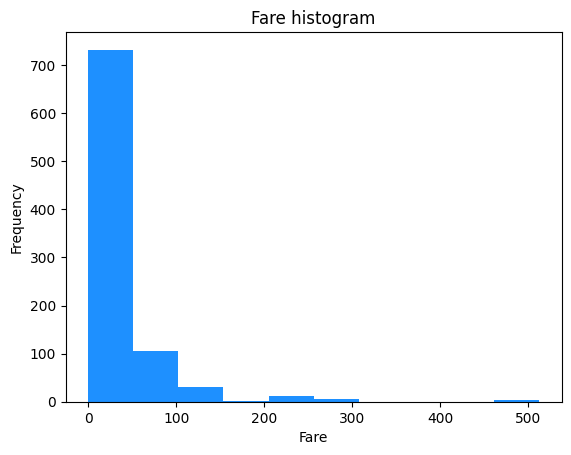

In [57]:
plt.hist(df["fare"], bins = 10 , color='dodgerblue')
plt.title("Fare histogram")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()

**Can be concluded:**
- Most passengers paid low ticket prices

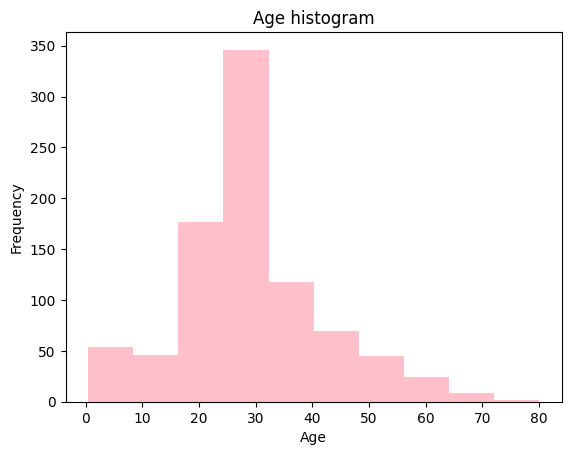

In [58]:
plt.hist(df["age"], bins = 10 , color='pink')
plt.title("Age histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**Can be concluded:**
- Most passengers were between 20 and 40 years old

------------------

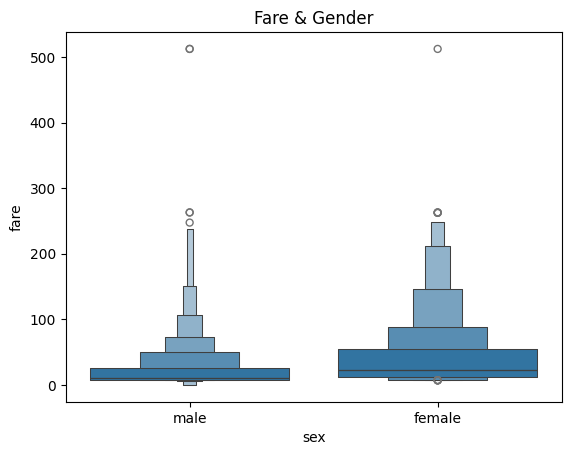

In [59]:
sns.boxenplot(x="sex" , y="fare" , data =df)
plt.title("Fare & Gender")
plt.show()

**Can be concluded:**
- female ticket fares are higher than male fares with higher median and overall price range

--------------------

## **INSIGHTS**
---------------

- There is a negative correlation between fare & pclass first class has higher fare
- There is a negative correlation between survived & pclass witch means
  the chance is higher for first class  

- Female survivors are more than males
- Female survivors = 233 = 68.1%
- males survivors  = 109 = 31.9%

- The chance is higher for :
  - females and first class at the same time
- The chance is lower for :
  - males and seconed class at the same time
- The chance is higher for :
  - 1 females
  - 2 males
  
  - 1 F_class 
  - 2 T_class
  - 3 S_class

- Most passengers paid low ticket prices

- Most passengers were between 20 and 40 years old

- female ticket fares are higher than male fares with higher median and overall price range

---------------------

In [60]:
import pandas as pd
import plotly.express as px
from dash import Dash, html, dcc

app = Dash(__name__)
app.layout = html.Div([
    html.H1("Titanic Survival Dashboard", style={'textAlign': 'center' , "color":"white"}),

###########################################
    dcc.Graph(
        figure=px.pie(df.groupby("sex")["survived"].sum().reset_index(), names="sex", values="survived",
                      title="Survival by Gender")
    ),
    html.P('''Insight : 
              Female survivors are more than males
              Female survivors = 233 = 68.1%
              males survivors  = 109 = 31.9%''' , style={"color":"white"}),
###########################################
    dcc.Graph(
        figure=px.histogram(df, x="age", color="survived",
                            nbins=20, title="Age Distribution by Survival")
    ),
    html.P('''Insight : 
              Most passengers were between 20 and 40 years old => survived''' , style={"color":"white"}),
###########################################
    dcc.Graph(
        figure=px.pie(df.groupby("class")["survived"].sum().reset_index() , names="class" , values="survived"
                      , title="Survived by Class")
    ),
    html.P('''Insight : 
              The chance is higher for Frist => Second => Third class''' , style={"color":"white"}),

])
###########################################
if __name__ == "__main__":
    app.run(debug=True, port=8051)


C:\Users\FreeComp\AppData\Local\Temp\ipykernel_11776\2358004835.py:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

